<a href="https://colab.research.google.com/github/Mirai-Kuma/DSProject/blob/master/Tourism_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# นำเข้าข้อมูลและแสดง Dataframe

### import และ อ่านไฟล์

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import folium
import geopandas as gpd
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors as mcolors
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle

warnings.filterwarnings("ignore")

In [53]:
tour = pd.read_csv('tourism_dataset.csv')

### แสดง dataframe

In [54]:
tour.head()

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


### แสดง info ของ dataframe

In [55]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.6+ KB


# Data Cleansing

### Clean data โดยการเพิ่ม attribute ID และเปลี่ยนชื่อประเทศให้อยู่ใน format เดียวกัน

In [56]:
tour = tour.reset_index().rename(columns = {'index':'ID'})
tour['Country'] = tour['Country'].replace('USA', 'United States of America')
tour.head()

,ID,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,1,aHKUXhjzTo,United States of America,Historical,813627,2.01,802625.60,No
2,2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


### การเพิ่ม feature ที่น่าสนใจ

เพิ่ม feature Satisfaction เพื่อให้ความหมายกับช่วงของ Rating เช่น ตังแต่ 4.0 ถึง 5.0 หมายถึง ดีมาก

In [57]:
def helper(x):
  if x >= 1 and x < 2:
    return 'Poor'
  elif x >= 2 and x < 3:
    return 'Fair'
  elif x >= 3 and x < 4:
    return 'Good'
  else:
    return 'Excellent'

tour['Satisfaction'] = tour['Rating'].apply(helper)

เพิ่ม feature Revenue per Visitor เพื่อดูสัดของค่าใช้จ่ายที่ได้รับโดยเฉลี่ยต่อผู้เข้าชม 1 คน

In [58]:
tour['Revenue_per_Visitor'] = tour['Revenue'] / tour['Visitors']

จัดเรียงตำแหน่งคอลัมน์ใหม่ให้คอลัมน์ที่มีความเกี่ยวข้องกันอยู่ใกล้เคียงกัน

In [59]:
new_order = ['ID', 'Location', 'Country', 'Category', 'Revenue', 'Visitors', 'Revenue_per_Visitor', 'Rating', 'Satisfaction', 'Accommodation_Available']
tour = tour[new_order]
tour

,ID,Location,Country,Category,Revenue,Visitors,Revenue_per_Visitor,Rating,Satisfaction,Accommodation_Available
0,0,kuBZRkVsAR,India,Nature,84388.38,948853,0.088937,1.32,Poor,Yes
1,1,aHKUXhjzTo,United States of America,Historical,802625.60,813627,0.986479,2.01,Fair,No
2,2,dlrdYtJFTA,Brazil,Nature,338777.11,508673,0.666002,1.42,Poor,Yes
3,3,DxmlzdGkHK,Brazil,Historical,295183.60,623329,0.473560,1.09,Poor,Yes
4,4,WJCCQlepnz,France,Cultural,547893.24,124867,4.387815,1.43,Poor,No
...,...,...,...,...,...,...,...,...,...,...
5984,5984,xAzwnVKAqz,United States of America,Urban,132848.78,828137,0.160419,1.97,Poor,No
5985,5985,IfKotyaJFC,France,Nature,325183.96,276317,1.176851,3.53,Good,Yes
5986,5986,bPyubCWGgA,Egypt,Beach,927336.50,809198,1.145995,3.37,Good,No
5987,5987,kkWIucpBnu,Egypt,Cultural,115791.43,808303,0.143253,2.52,Fair,Yes


# ค่าสถิติเบื้องต้นและการกระจายตัวของข้อมูล

## ค่าทางสถิติเบื้องต้นของแต่ละ feature

In [60]:
tour.describe().drop(columns=['ID'])

,Revenue,Visitors,Revenue_per_Visitor,Rating
count,5989.000000,5989.000000,5989.000000,5989.000000
mean,499479.367253,501016.089497,3.624295,3.009347
std,286743.225211,289783.294978,18.763034,1.155980
min,1025.810000,1108.000000,0.001350,1.000000
25%,251410.450000,252789.000000,0.502985,2.010000
50%,494169.350000,500831.000000,1.005356,3.000000
75%,742241.240000,751371.000000,2.000396,4.010000
max,999999.490000,999982.000000,784.127343,5.000000


In [61]:
tour.describe(include='object').drop(columns=['Location'])

,Country,Category,Satisfaction,Accommodation_Available
count,5989,5989,5989,5989
unique,7,6,4,2
top,Egypt,Adventure,Fair,Yes
freq,912,1037,1512,3013


## ค่าเฉลี่ยต่างๆ

In [67]:
mean_df = pd.DataFrame(tour.groupby('Country')['Visitors'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Revenue'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Rating'].mean().sort_values(ascending=False))
mean_df = mean_df.join(tour.groupby('Country')['Revenue_per_Visitor'].mean().sort_values(ascending=False))
print('Max Visitors by Country:', mean_df['Visitors'].idxmax(), '-', mean_df['Visitors'].max())
print('Min Visitors by Country:', mean_df['Visitors'].idxmin(), '-', mean_df['Visitors'].min())
print('Max Revenue by Country:', mean_df['Revenue'].idxmax(), '-', mean_df['Revenue'].max())
print('Min Revenue by Country:', mean_df['Revenue'].idxmin(), '-', mean_df['Revenue'].min())
print('Max Rating by Country:', mean_df['Rating'].idxmax(), '-', mean_df['Rating'].max())
print('Min Rating by Country:', mean_df['Rating'].idxmin(), '-', mean_df['Rating'].min())
print('Max Revenue per Visitor by Country:', mean_df['Revenue_per_Visitor'].idxmax(), '-', mean_df['Revenue_per_Visitor'].max())
print('Min Revenue per Visitor by Country:', mean_df['Revenue_per_Visitor'].idxmin(), '-', mean_df['Revenue_per_Visitor'].min())
mean_df

Max Visitors by Country: United States of America - 508495.50353773584
Min Visitors by Country: Brazil - 493206.56904761906
Max Revenue by Country: Brazil - 508075.23841666663
Min Revenue by Country: France - 479027.5872462077
Max Rating by Country: Brazil - 3.0741666666666667
Min Rating by Country: China - 2.958647642679901
Max Revenue per Visitor by Country: China - 4.845314868993517
Min Revenue per Visitor by Country: France - 2.539499416052928


,Visitors,Revenue,Rating,Revenue_per_Visitor
Country,,,,
United States of America,508495.503538,504369.440507,2.984304,3.645416
India,503440.853795,507451.226953,2.973158,2.891662
Egypt,502821.986842,505038.149704,3.024298,3.311338
China,501796.987593,494332.975496,2.958648,4.845315
Australia,501250.608434,497184.737663,3.019602,3.900140
France,495851.366394,479027.587246,3.030268,2.539499
Brazil,493206.569048,508075.238417,3.074167,4.386822


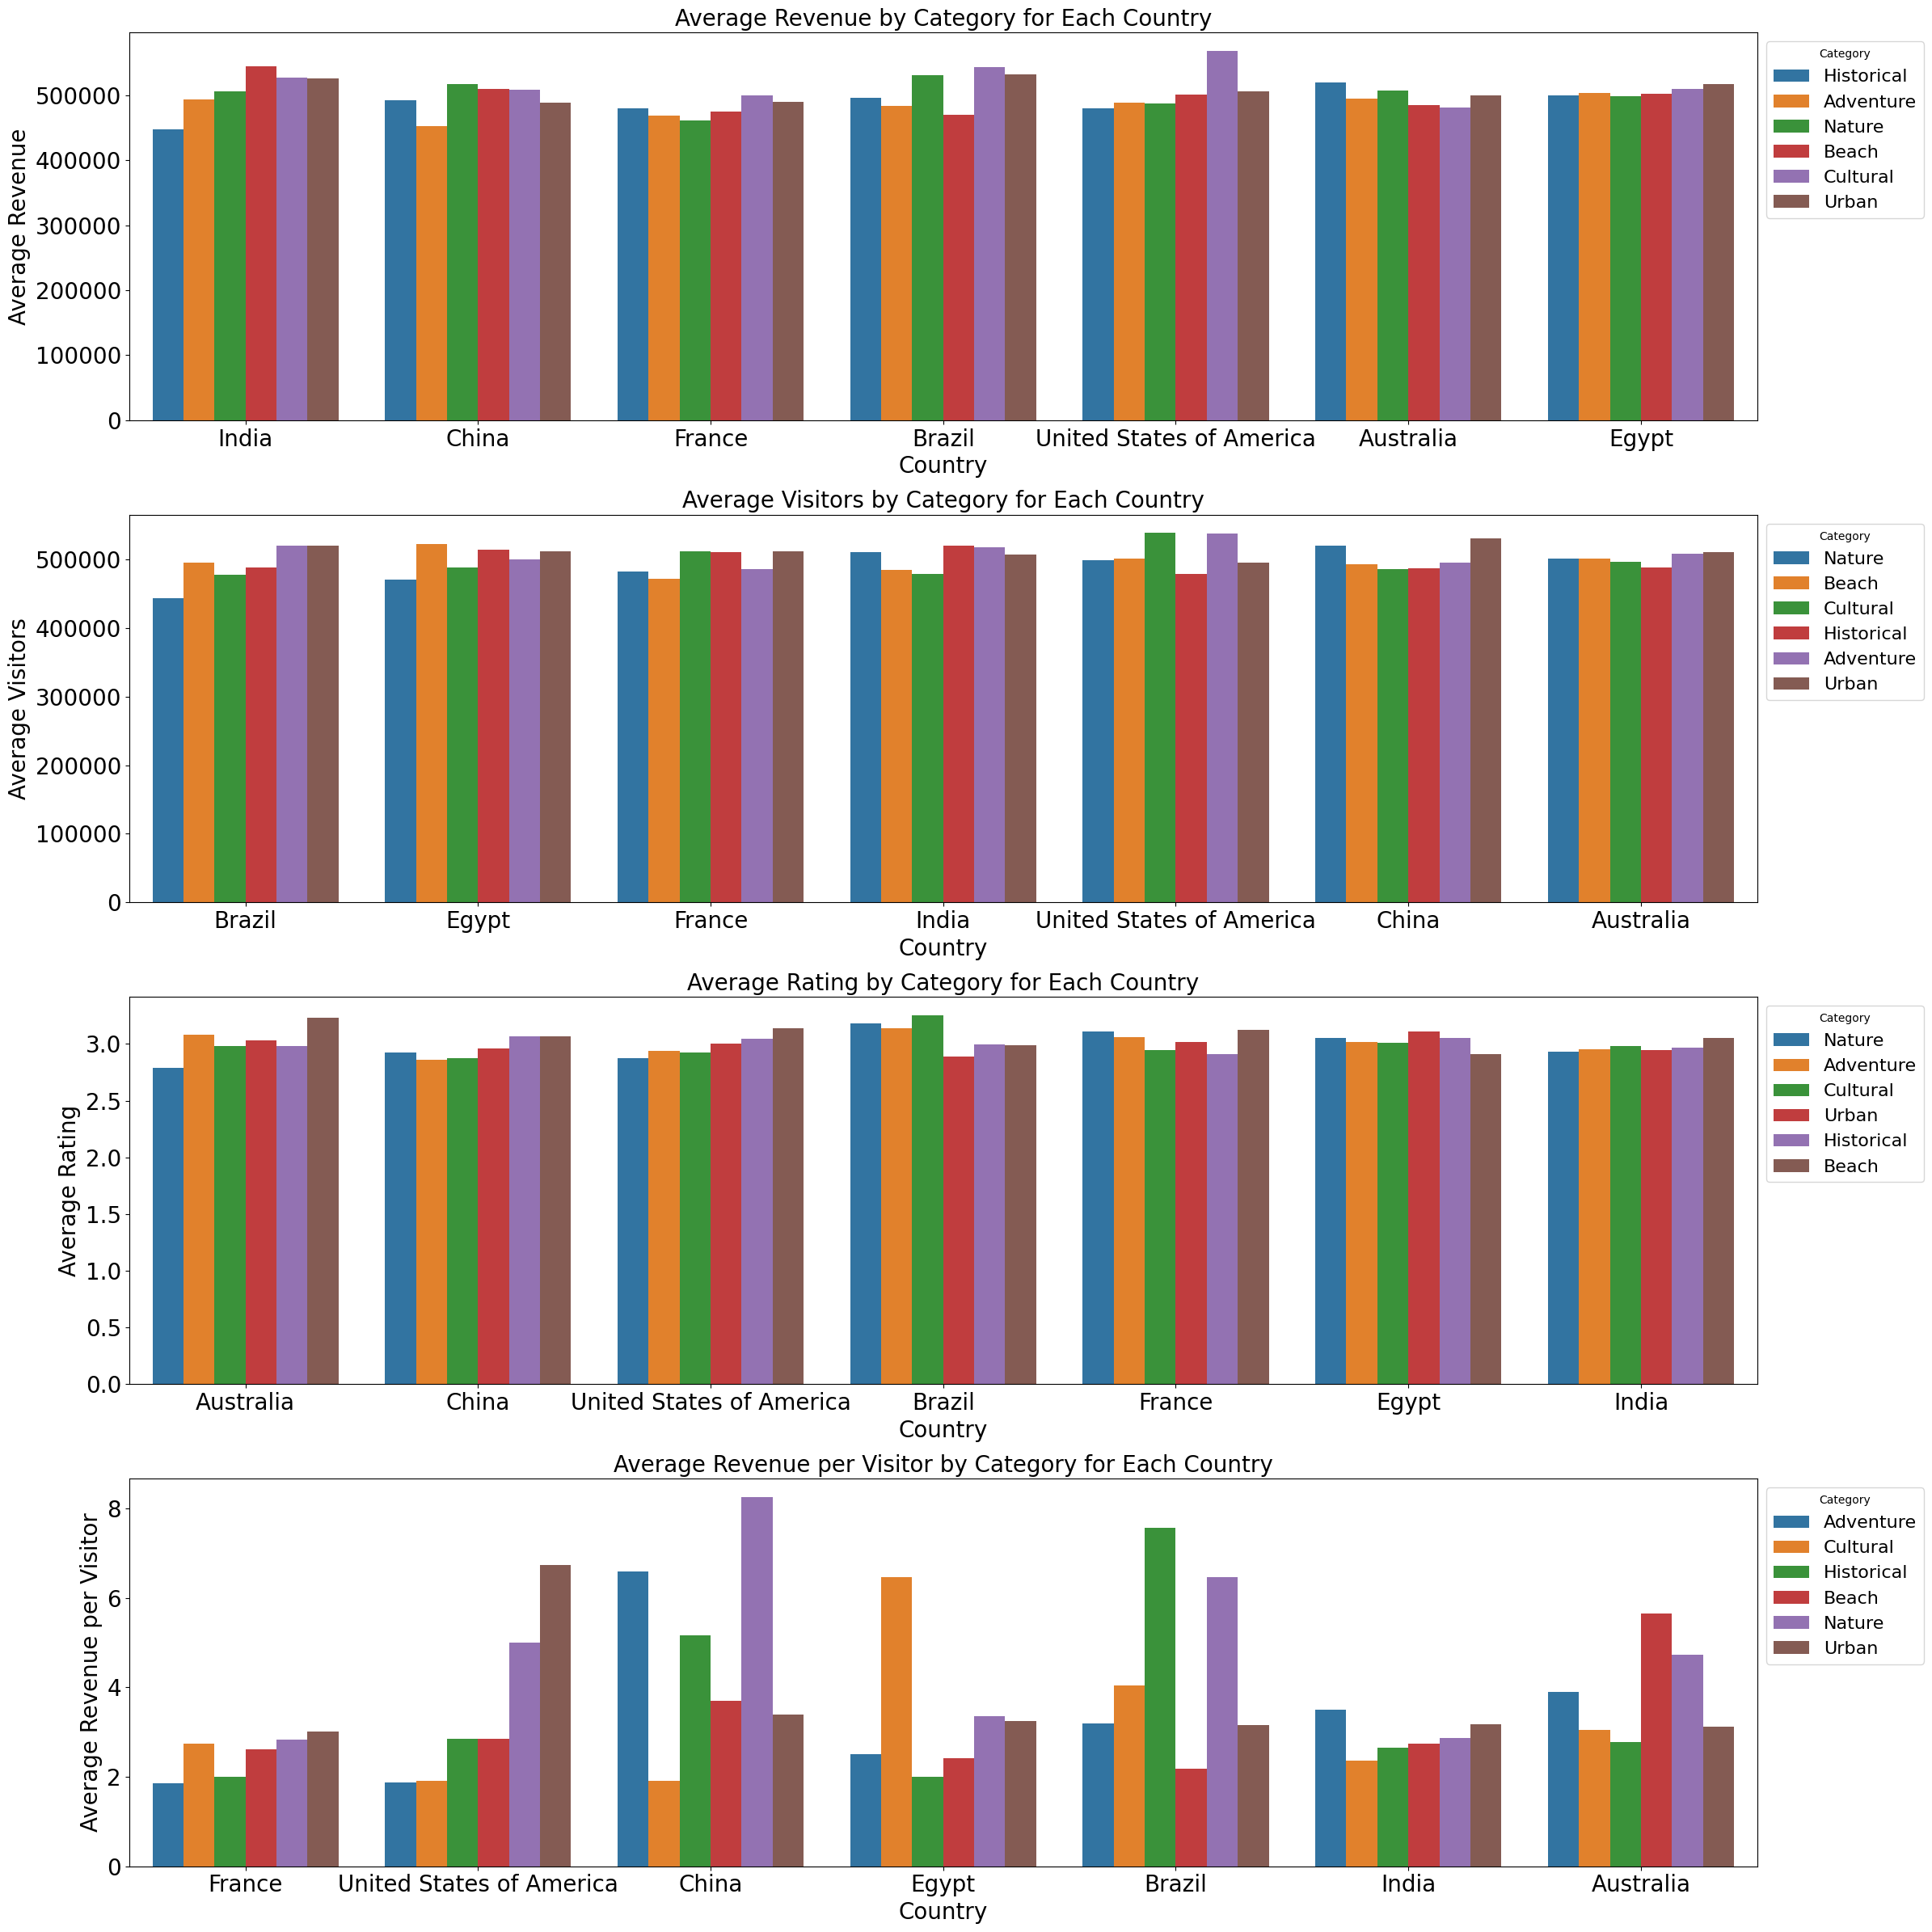

In [71]:
avg_revenue = tour.groupby(['Country', 'Category'])['Revenue'].mean().sort_values().reset_index()
avg_visitors = tour.groupby(['Country', 'Category'])['Visitors'].mean().sort_values().reset_index()
avg_rating = tour.groupby(['Country', 'Category'])['Rating'].mean().sort_values().reset_index()
avg_revenue_per_visitor = tour.groupby(['Country', 'Category'])['Revenue_per_Visitor'].mean().sort_values().reset_index()

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(24, 24))

# กราฟ Revenue
sns.barplot(data=avg_revenue, ax=ax[0], x='Country', y='Revenue', hue='Category')
ax[0].set_title('Average Revenue by Category for Each Country', fontsize=20)
ax[0].set_xlabel('Country', fontsize=20)
ax[0].set_ylabel('Average Revenue', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Visitors
sns.barplot(data=avg_visitors, ax=ax[1], x='Country', y='Visitors', hue='Category')
ax[1].set_title('Average Visitors by Category for Each Country', fontsize=20)
ax[1].set_xlabel('Country', fontsize=20)
ax[1].set_ylabel('Average Visitors', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Rating
sns.barplot(data=avg_rating, ax=ax[2], x='Country', y='Rating', hue='Category')
ax[2].set_title('Average Rating by Category for Each Country', fontsize=20)
ax[2].set_xlabel('Country', fontsize=20)
ax[2].set_ylabel('Average Rating', fontsize=20)
ax[2].tick_params(axis='both', labelsize=20)
ax[2].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

# กราฟ Revenue per Visitor
sns.barplot(data=avg_revenue_per_visitor, ax=ax[3], x='Country', y='Revenue_per_Visitor', hue='Category')
ax[3].set_title('Average Revenue per Visitor by Category for Each Country', fontsize=20)
ax[3].set_xlabel('Country', fontsize=20)
ax[3].set_ylabel('Average Revenue per Visitor', fontsize=20)
ax[3].tick_params(axis='both', labelsize=20)
ax[3].legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)

plt.tight_layout()
plt.show()

## การแสดงความถี่และความหนาแน่น

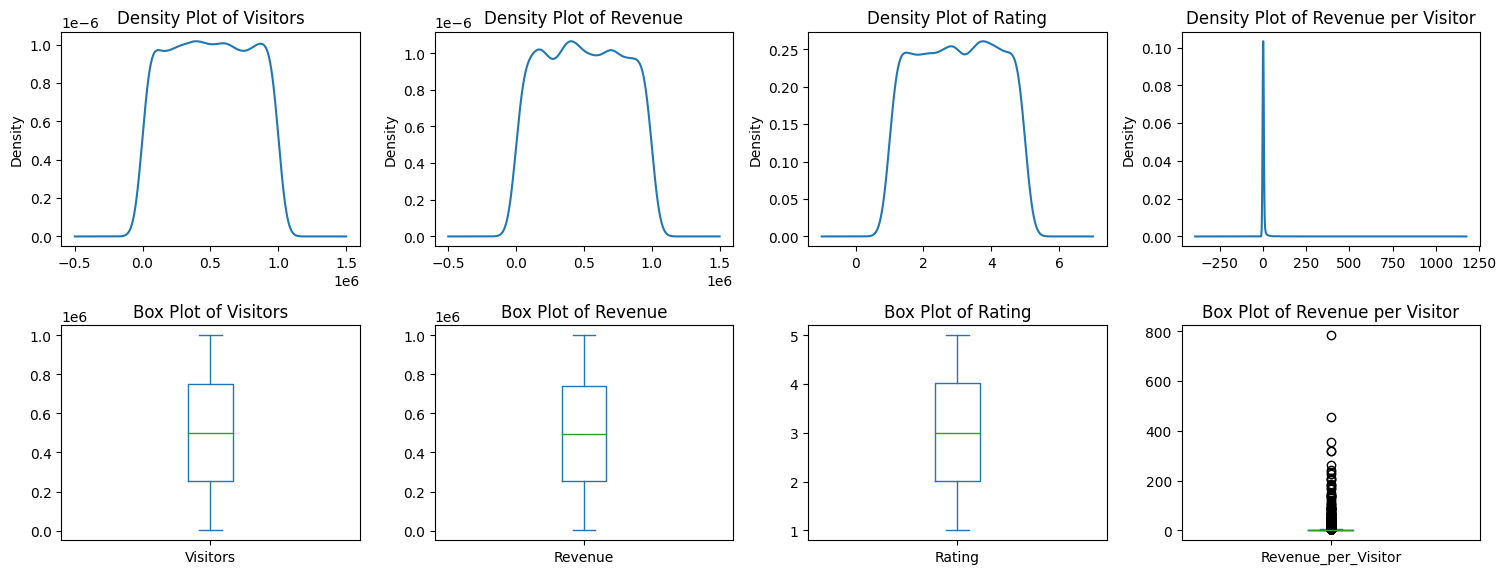

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
tour['Visitors'].plot(ax=ax[0, 0], kind='density')
tour['Revenue'].plot(ax=ax[0, 1], kind='density')
tour['Rating'].plot(ax=ax[0, 2], kind='density')
tour['Revenue_per_Visitor'].plot(ax=ax[0, 3], kind='density')
tour['Visitors'].plot(ax=ax[1, 0], kind='box')
tour['Revenue'].plot(ax=ax[1, 1], kind='box')
tour['Rating'].plot(ax=ax[1, 2], kind='box')
tour['Revenue_per_Visitor'].plot(ax=ax[1, 3], kind='box')
ax[0, 0].set_title('Density Plot of Visitors')
ax[0, 1].set_title('Density Plot of Revenue')
ax[0, 2].set_title('Density Plot of Rating')
ax[0, 3].set_title('Density Plot of Revenue per Visitor')
ax[1, 0].set_title('Box Plot of Visitors')
ax[1, 1].set_title('Box Plot of Revenue')
ax[1, 2].set_title('Box Plot of Rating')
ax[1, 3].set_title('Box Plot of Revenue per Visitor')
plt.tight_layout()
plt.show()

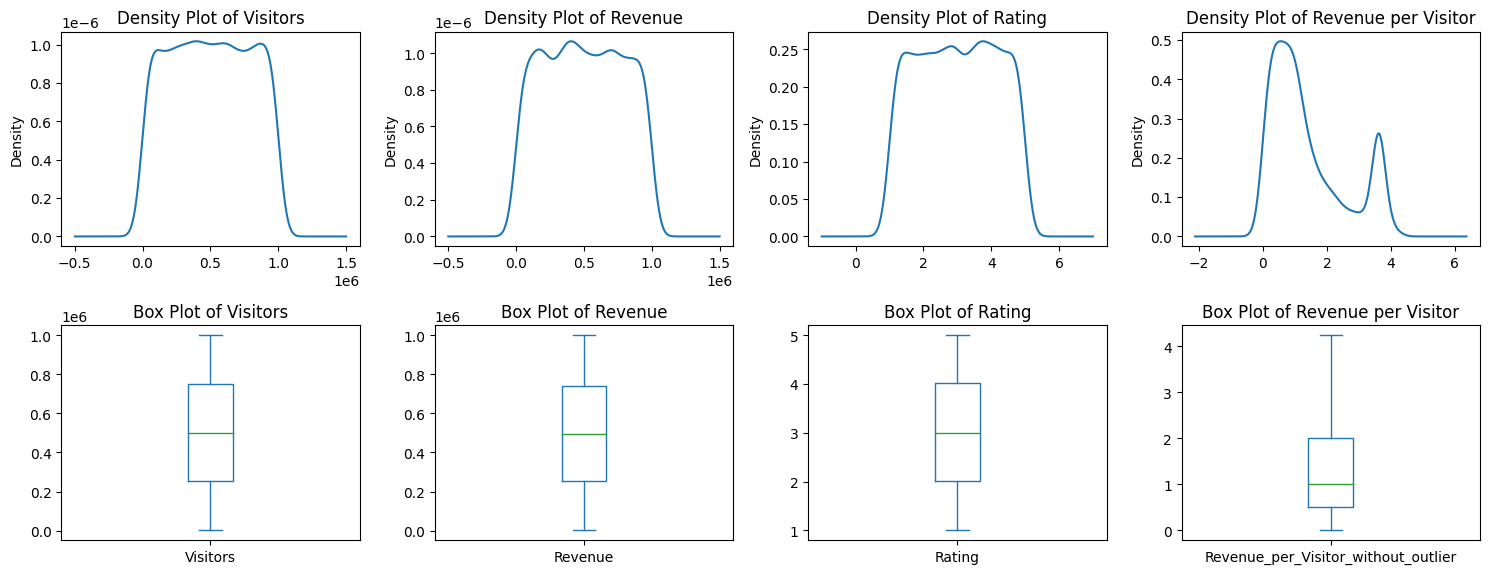

In [88]:
Q1 = tour['Revenue_per_Visitor'].quantile(0.25)
Q3 = tour['Revenue_per_Visitor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tour['Revenue_per_Visitor_without_outlier'] = tour['Revenue_per_Visitor'].apply(lambda x: x if (x > lower_bound and x < upper_bound) else tour['Revenue_per_Visitor'].mean())

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
tour['Visitors'].plot(ax=ax[0, 0], kind='density')
tour['Revenue'].plot(ax=ax[0, 1], kind='density')
tour['Rating'].plot(ax=ax[0, 2], kind='density')
tour['Revenue_per_Visitor_without_outlier'].plot(ax=ax[0, 3], kind='density')
tour['Visitors'].plot(ax=ax[1, 0], kind='box')
tour['Revenue'].plot(ax=ax[1, 1], kind='box')
tour['Rating'].plot(ax=ax[1, 2], kind='box')
tour['Revenue_per_Visitor_without_outlier'].plot(ax=ax[1, 3], kind='box')
ax[0, 0].set_title('Density Plot of Visitors')
ax[0, 1].set_title('Density Plot of Revenue')
ax[0, 2].set_title('Density Plot of Rating')
ax[0, 3].set_title('Density Plot of Revenue per Visitor')
ax[1, 0].set_title('Box Plot of Visitors')
ax[1, 1].set_title('Box Plot of Revenue')
ax[1, 2].set_title('Box Plot of Rating')
ax[1, 3].set_title('Box Plot of Revenue per Visitor')
plt.tight_layout()
plt.show()

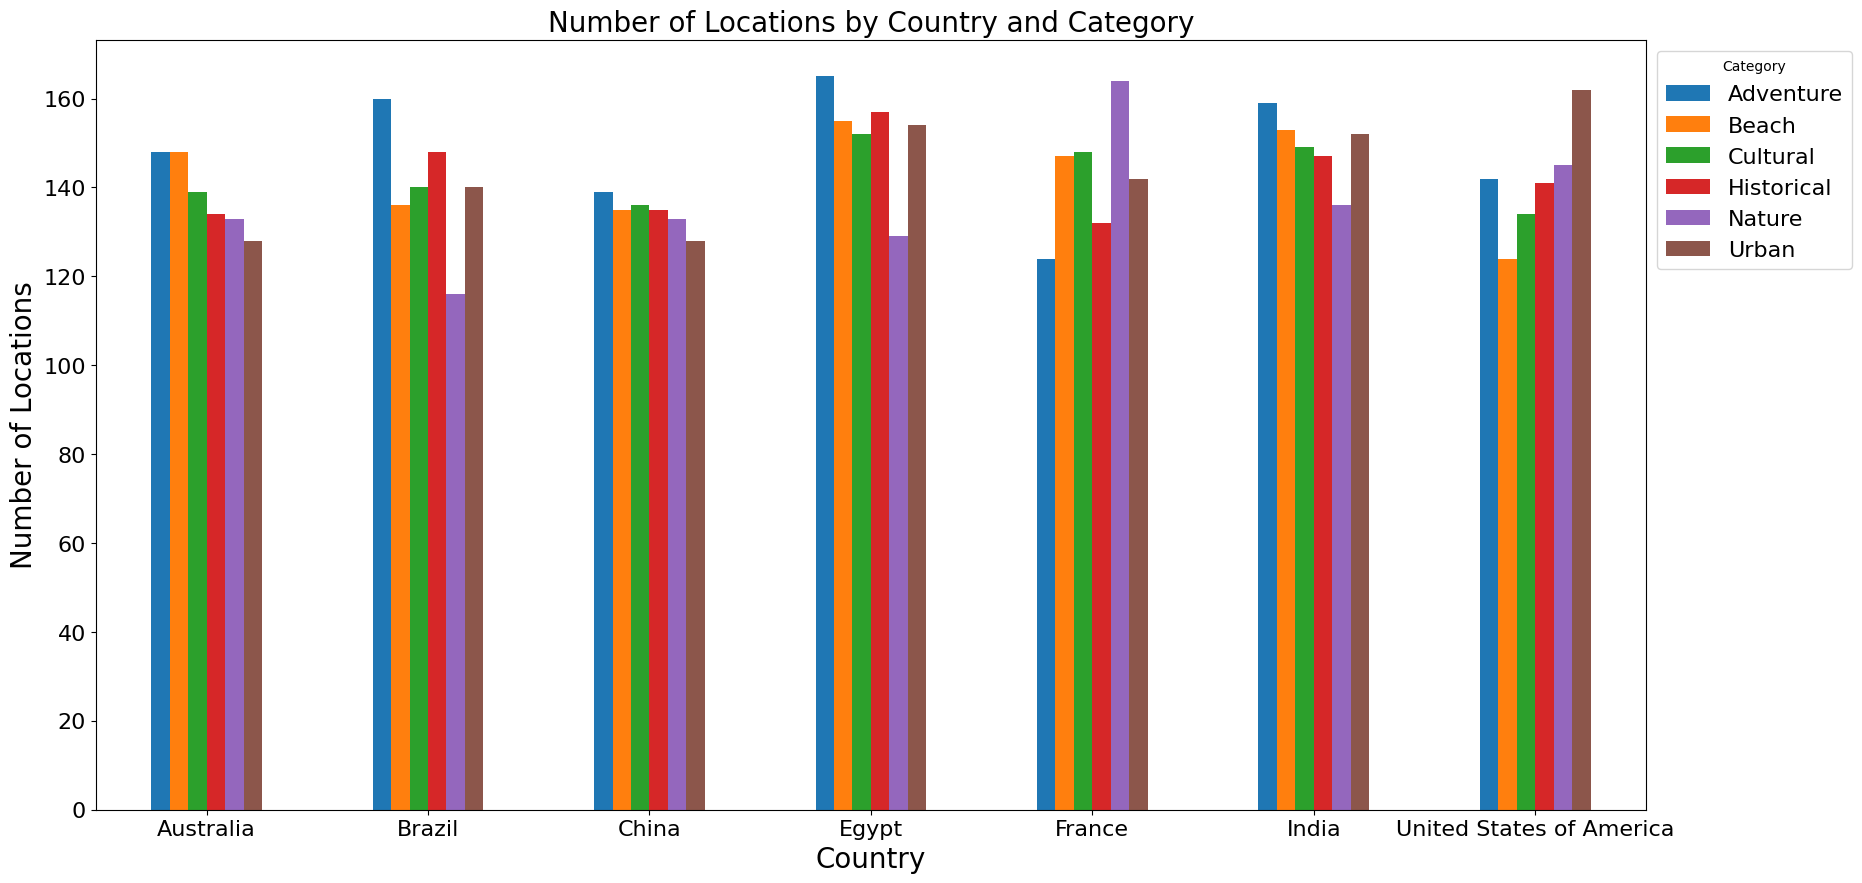

In [65]:
tour.groupby(['Country', 'Category'])['Location'].count().unstack().plot(kind='bar', figsize=(20, 10))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Number of Locations', fontsize=20)
plt.title('Number of Locations by Country and Category', fontsize=20)
plt.legend(title='Category', loc='upper left',bbox_to_anchor=(1 , 1) , fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# การทดสอบทางสถิติและหาความสัมพันธ์ระหว่าง feature